 # Cvičení 6. Preprocesing dat a explorační analýza 
 ## Michal Béreš, Adéla Vrtková, Martina Litschmannová
 ---

 # 1. Rozšiřující balíčky funkcí - instalace a načítání

In [58]:
# Instalování balíčků nutné pouze jednou (pokud je již nemáte)
# install.packages("readxl")
# install.packages("dplyr")
# install.packages("openxlsx")


In [59]:
# Načtení balíčku (nutno opakovat při každém novém spuštění Rka, vhodné mít na začátku skriptu, pro kontrolu
# co všechno se používá)

library(dplyr) # balíček pro manipulaci s daty

# výpis obsahuje upozornění na přepsané funkce případně na starší verzi balíčku

Právě kvůli maskování (přepisování existujících funkcí) je dobré omezit kompletní načtení balíčků na minimum.

Často potřebujeme pouze jednu funkci z balíčku, pak lze tato funkce načíst pomocí `::`.

Ukážeme si později.

---


# 2. Pracovní adresář (working directory) - odkud načítáme a kam ukládáme data
- Pozor aktuální otevřená složka v Rstudiu, případně umístění Rskriptu není automaticky pracovní adresář!

In [60]:
# Výpis pracovního adresáře
getwd()


[1] "/home/patrick115/Projects/VSB/Semester7/PS/CV6"

In [61]:
# Nastavení pracovního adresáře -> do uvozovek, celou cestu (relativní nebo absolutní)
setwd("./data")


In [62]:
getwd() # kde jsme teď


[1] "/home/patrick115/Projects/VSB/Semester7/PS/CV6/data"

In [63]:
setwd("./..") # zase zpátky


In [64]:
getwd() # kontrola


[1] "/home/patrick115/Projects/VSB/Semester7/PS/CV6"

---


# 3. Načítání datových souborů

- pro ověření správnosti načtení budeme použífat funkci `head()` která vypíše prvních 6 řádků datového souboru

### a) Ze souboru CSV
Základní funkce - `read.table`, `read.csv`, `read.csv2`, ...

Záleží hlavně na formátu souboru (.txt, .csv), na tzv. oddělovači jednotlivých hodnot, desetinné čárce/tečce, ...

In [65]:
# pro data oddělené středníkem lze použít read.csv2 s defaultním nastavením
# načteme data relativně k aktuálnímu adresáři, tedy ze složky data
data <- read.csv2(file = "./data/zarovky.csv")
head(data)

,A22,A5,B22,B5,C22,C5,D22,D5
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,784.9,786.6,849.7,850.9,822.4,823.4,773.8,772.6
2,782,783.8,831.9,833.2,783.5,787.2,809.3,812.9
3,782.6,785.3,828.5,825,790,787.7,826,830
4,777.7,772.2,795.5,790.5,792.7,795.3,778.1,781.9
5,824.7,825.3,815.2,817.9,829.4,831.5,777.3,772.4
6,759.1,759.1,804.9,801.1,799,798.7,797.6,795.7


In [66]:
# pokud má soubor jiný formát, lze upravit parametry načítání
data <- read.csv2(file = "./data/zarovky.csv", sep = ";", quote = "", skip = 0, header = TRUE)
head(data)


,A22,A5,B22,B5,C22,C5,D22,D5
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,784.9,786.6,849.7,850.9,822.4,823.4,773.8,772.6
2,782,783.8,831.9,833.2,783.5,787.2,809.3,812.9
3,782.6,785.3,828.5,825,790,787.7,826,830
4,777.7,772.2,795.5,790.5,792.7,795.3,778.1,781.9
5,824.7,825.3,815.2,817.9,829.4,831.5,777.3,772.4
6,759.1,759.1,804.9,801.1,799,798.7,797.6,795.7


In [67]:
# cesta souboru může být relativní, absulutní nebo lze použít i URL
# data <- read.csv2(file = "C:/Users/username/Documents/aku.csv")
# data <- read.csv2(file = "./data/aku.csv")
# data <- read.csv2(file = "http://am-nas.vsb.cz/lit40/DATA/aku.csv")


### b) z Excelu (souboru xlsx)
K načtení/uložení datového souboru ve formátu xlsx použijeme funkci z balíčku `readxl`
- konkrétně funkci `readxl::read_excel()`

In [68]:
# při načítání dat z Excelu si sice nemusíme dělat starosti s oddělovači a formátem čísel
# musíme však specifikovat který list chceme načíst a případně kolik řádků od začátku chceme přeskočit
data <- readxl::read_excel("./data/zarovky.xlsx", sheet = "Data", skip = 3)
head(data)

New names:
• `` -> `...1`
• `Amber` -> `Amber...2`
• `Bright` -> `Bright...3`
• `Clear` -> `Clear...4`
• `Dim` -> `Dim...5`
• `Amber` -> `Amber...6`
• `Bright` -> `Bright...7`
• `Clear` -> `Clear...8`
• `Dim` -> `Dim...9`


...1,Amber...2,Bright...3,Clear...4,Dim...5,Amber...6,Bright...7,Clear...8,Dim...9
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,784.9,849.7,822.4,773.8,786.6,850.9,823.4,772.6
2,782.0,831.9,783.5,809.3,783.8,833.2,787.2,812.9
3,782.6,828.5,790.0,826.0,785.3,825.0,787.7,830.0
4,777.7,795.5,792.7,778.1,772.2,790.5,795.3,781.9
5,824.7,815.2,829.4,777.3,825.3,817.9,831.5,772.4
6,759.1,804.9,799.0,797.6,759.1,801.1,798.7,795.7


### c) Odstranění nepotřebných sloupců a jejich přejmenování pro snadnější adresování dat

In [69]:
# indexování se zápornými indexy vrátí vše kromě hodnoty indexů
# nelze míchat záporné a kladné indexy!
data <- data[, -1] # odstraníme první sloupec s indexy
head(data)


Amber...2,Bright...3,Clear...4,Dim...5,Amber...6,Bright...7,Clear...8,Dim...9
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
784.9,849.7,822.4,773.8,786.6,850.9,823.4,772.6
782.0,831.9,783.5,809.3,783.8,833.2,787.2,812.9
782.6,828.5,790.0,826.0,785.3,825.0,787.7,830.0
777.7,795.5,792.7,778.1,772.2,790.5,795.3,781.9
824.7,815.2,829.4,777.3,825.3,817.9,831.5,772.4
759.1,804.9,799.0,797.6,759.1,801.1,798.7,795.7


In [70]:
# Přejmenování sloupců (obecně diakritika a mezery v názvech sloupců komplikují práci)
colnames(data) <- c("A5", "B5", "C5", "D5", "A22", "B22", "C22", "D22")
head(data)


A5,B5,C5,D5,A22,B22,C22,D22
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
784.9,849.7,822.4,773.8,786.6,850.9,823.4,772.6
782.0,831.9,783.5,809.3,783.8,833.2,787.2,812.9
782.6,828.5,790.0,826.0,785.3,825.0,787.7,830.0
777.7,795.5,792.7,778.1,772.2,790.5,795.3,781.9
824.7,815.2,829.4,777.3,825.3,817.9,831.5,772.4
759.1,804.9,799.0,797.6,759.1,801.1,798.7,795.7


**Poznámka:**

V R jsou aktuálně dva formáty reprezentace tabulek: `data.frame` a `tibble`.

Objekt importovaný touto cestou bude v novém RStudiu jako typ "tibble".

Jedná se o modernější "data.frame" a v některých funkcích může dělat problémy a házet errory!
Jednoduše lze tento objekt převést na typ data.frame pomocí **as.data.frame()**

---

# 4. Standardní datový formát (a převod do něj)

Standardní datový formát (v **R** tzv. *"long format"*) se vyznačuje tím, že:

- **Každý řádek tabulky obsahuje jednu pozorovanou entitu**, například:
  - jednoho pacienta,
  - jednu žárovku,
  - jednoho studenta, atd.
  
  To znamená, že data o produktech dvou firem **nemohou** být v jednom řádku – místo toho se přidá samostatný sloupec s identifikátorem firmy.

- **V jednom sloupci jsou vždy data jednoho typu**:
  - Je vhodné mít **jeden samostatný sloupec pro `id` entity** (například pro odstranění odlehlých pozorování). Například pomocí: ```data$id <- seq_along(data$...)``` nebo s pomocí balíčku `dplyr` a funkce `mutate()`: ```data <- data %>% mutate(id = row_number())```


### a) Základní převod jednoduché datové matice do standardního datového formátu - `stack(...)`

In [71]:
data5 <- data[, 1:4] # z dat vybereme ty sloupce, které odpovídají měřením po 5 cyklech
colnames(data5) <- c("Amber", "Bright", "Clear", "Dim") # přejmenujeme sloupce
head(data5)


Amber,Bright,Clear,Dim
<dbl>,<dbl>,<dbl>,<dbl>
784.9,849.7,822.4,773.8
782.0,831.9,783.5,809.3
782.6,828.5,790.0,826.0
777.7,795.5,792.7,778.1
824.7,815.2,829.4,777.3
759.1,804.9,799.0,797.6


In [72]:
data5S <- stack(data5) # a převedeme do st. datového formátu
head(data5S)


,values,ind
,<dbl>,<fct>
1,784.9,Amber
2,782.0,Amber
3,782.6,Amber
4,777.7,Amber
5,824.7,Amber
6,759.1,Amber


In [73]:
# přejmenujeme sloupce
colnames(data5S) <- c("tok5", "vyrobce")

# a přidáme slopec is id
data5S$id <- seq_along(data5S$tok5)

head(data5S)

,tok5,vyrobce,id
,<dbl>,<fct>,<int>
1,784.9,Amber,1
2,782.0,Amber,2
3,782.6,Amber,3
4,777.7,Amber,4
5,824.7,Amber,5
6,759.1,Amber,6



### b) Z dat ve formátu Datová matice `reshape(...)`

In [74]:
data_DM <- readxl::read_excel("./data/datova_matice.xlsx")
head(data_DM)


New names:
• `` -> `...1`


...1,Amber Světelný tok při teplotě 22 °C (lm),Amber Světelný tok při teplotě 5 °C (lm),Bright Světelný tok při teplotě 22 °C (lm),Bright Světelný tok při teplotě 5 °C (lm),Clear Světelný tok při teplotě 22 °C (lm),Clear Světelný tok při teplotě 5 °C (lm),Dim Světelný tok při teplotě 22 °C (lm),Dim Světelný tok při teplotě 5 °C (lm)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,784.9,786.6,849.7,850.9,822.4,823.4,773.8,772.6
1,782.0,783.8,831.9,833.2,783.5,787.2,809.3,812.9
2,782.6,785.3,828.5,825.0,790.0,787.7,826.0,830.0
3,777.7,772.2,795.5,790.5,792.7,795.3,778.1,781.9
4,824.7,825.3,815.2,817.9,829.4,831.5,777.3,772.4
5,759.1,759.1,804.9,801.1,799.0,798.7,797.6,795.7


In [75]:
# smažeme první sloupec
data_DM <- data_DM[, -1]
# přejmenujeme sloupce
colnames(data_DM) <- c("A22", "A5", "B22", "B5", "C22", "C5", "D22", "D5")
head(data_DM)


A22,A5,B22,B5,C22,C5,D22,D5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
784.9,786.6,849.7,850.9,822.4,823.4,773.8,772.6
782.0,783.8,831.9,833.2,783.5,787.2,809.3,812.9
782.6,785.3,828.5,825.0,790.0,787.7,826.0,830.0
777.7,772.2,795.5,790.5,792.7,795.3,778.1,781.9
824.7,825.3,815.2,817.9,829.4,831.5,777.3,772.4
759.1,759.1,804.9,801.1,799.0,798.7,797.6,795.7


#### Funkce `reshape`:  
```r
reshape(data, direction, varying, v.names, times, timevar)
```

- **`data`** – Data k převedení musí být ve formátu `data.frame` nebo `tibble`.
- **`direction`** – Směr transformace:
  - `"long"` – převod do standardního formátu (*long format*).
  - `"wide"` – převod zpět do datové matice (*wide format*).
- **`varying`** – Názvy sloupců, které označují stejná data pro různé kategorie:
  - Je to **seznam vektorů** (`list`).
  - Každá položka listu odpovídá **jednomu měření**.
  - Každý vektor obsahuje seznam odpovídajících sloupců.
- **`v.names`** – Názvy sloupců ve standardním datovém formátu:
  - Počet názvů musí odpovídat počtu vektorů ve `varying`.
- **`times`** – Názvy jednotlivých kategorií:
  - ⚠ **Musí být ve stejném pořadí jako odpovídající sloupce ve `varying`!**
- **`timevar`** – Název sloupce obsahujícího kategorie.


In [76]:
dataS <- reshape(
    data = as.data.frame(data_DM),
    direction = "long",
    varying = list(
        c("A5", "B5", "C5", "D5"),
        c("A22", "B22", "C22", "D22")
    ),
    v.names = c("tok5", "tok22"),
    times = c("Amber", "Bright", "Clear", "Dim"),
    timevar = "vyrobce"
)
head(dataS)


,vyrobce,tok5,tok22,id
,<chr>,<dbl>,<dbl>,<int>
1.Amber,Amber,786.6,784.9,1
2.Amber,Amber,783.8,782.0,2
3.Amber,Amber,785.3,782.6,3
4.Amber,Amber,772.2,777.7,4
5.Amber,Amber,825.3,824.7,5
6.Amber,Amber,759.1,759.1,6


### c) Z datového souboru, kde jsou kategorie (např. výrobci) v jednotlivých listech Excelu

V tomto případě bohužel **nelze využít vestavěnou funkci**, která by provedla operaci automaticky. Musíme to provést ručně následujícím postupem:

1. **Načteme všechny listy Excelu** do samostatných proměnných.
2. **Ke každé proměnné přidáme sloupec s kategorií** (např. výrobce).
3. **Spojíme všechny proměnné do jedné tabulky** pomocí funkce:
   ```r
   rbind(data1, data2, data3, ...)
    ```

In [77]:
# načteme všechny listy do separátních proměnných
data_A <- readxl::read_excel("./data/po_listech.xlsx", sheet = 1)
head(data_A)
data_B <- readxl::read_excel("./data/po_listech.xlsx", sheet = 2)
data_C <- readxl::read_excel("./data/po_listech.xlsx", sheet = 3)
data_D <- readxl::read_excel("./data/po_listech.xlsx", sheet = 4)


New names:
• `` -> `...1`


...1,Světelný tok při teplotě 22 °C (lm),Světelný tok při teplotě 5 °C (lm)
<dbl>,<dbl>,<dbl>
0,825.2,828.9
1,855.4,847.4
2,823.3,813.3
3,826.1,815.2
4,785.5,781.1
5,835.0,828.3


New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`


In [78]:
# přidáme sloupec s výrobcem
data_A$vyrobce <- "Amber"
data_B$vyrobce <- "Bright"
data_C$vyrobce <- "Clear"
data_D$vyrobce <- "Dim"
head(data_A)


...1,Světelný tok při teplotě 22 °C (lm),Světelný tok při teplotě 5 °C (lm),vyrobce
<dbl>,<dbl>,<dbl>,<chr>
0,825.2,828.9,Amber
1,855.4,847.4,Amber
2,823.3,813.3,Amber
3,826.1,815.2,Amber
4,785.5,781.1,Amber
5,835.0,828.3,Amber


In [79]:
# sloučíme všechny listy do jednoho pomocí rbind
# v prvním sloupci je sice id, ale je jen vůči danému listu, ne vůči celé tabulce
dataS2 <- rbind(data_A, data_B, data_C, data_D)
dataS2 <- dataS2[, -1]
tail(dataS2)


Světelný tok při teplotě 22 °C (lm),Světelný tok při teplotě 5 °C (lm),vyrobce
<dbl>,<dbl>,<chr>
817.7,821.7,Dim
821.9,820.9,Dim
818.4,821.9,Dim
828.0,821.9,Dim
807.1,806.6,Dim
857.4,868.6,Dim


In [80]:
# přejmenujeme sloupce
colnames(dataS2) <- c("tok5", "tok22", "vyrobce")
# přidáme sloupec s id
dataS2$id <- seq_along(dataS2$tok5)
head(dataS2)

tok5,tok22,vyrobce,id
<dbl>,<dbl>,<chr>,<int>
825.2,828.9,Amber,1
855.4,847.4,Amber,2
823.3,813.3,Amber,3
826.1,815.2,Amber,4
785.5,781.1,Amber,5
835.0,828.3,Amber,6


---


# 5. Knihovna Dplyr


### a) Přehled funkcí knihovny `dplyr`

- **`%>%`** je tzv. pipe operátor. Typické využití je ve tvaru:
  ```r
  res = data %>% operace
  ```
  kde výsledkem je aplikovaná operace na `data`.
    - v Rstudio lze zapsat jako `Ctrl + Shift + M`

- **`select(...)`** slouží k výběru sloupců v datovém rámci:
  - `select(1)` – vybere první sloupec.
  - `select(A5)` – vybere sloupec se jménem `A5`.
  - `select(1,3,5)` – vybere sloupce 1, 3 a 5.

- **`mutate(novy_sloupec = ...)`** vytvoří v datovém rámci nový sloupec pomocí výpočtu nad existujícími sloupci:
  ```r
  data %>% mutate(C = A - B)
  ```
  Tento příkaz vytvoří v datovém rámci `data` nový sloupec `C` jako rozdíl hodnot ve stávajících sloupcích `A` a `B`.

- **`filter(...)`** vyfiltruje záznamy splňující zadané podmínky:
  - `data %>% filter(vyrobce == "A" | vyrobce == "B")`  
    Vrátí datový rámec, kde sloupec `vyrobce` obsahuje pouze hodnoty `"A"` nebo `"B"`.
  - `data %>% filter(vyrobce == "A", hodnoty > 1000)`  
    Pokud jsou podmínky odděleny čárkou, chápeme je jako **"a zároveň"**.

- **`summarise(...)`** vypočítá číselné charakteristiky v rámci zadaných sloupců (vhodné pro kombinaci s `group_by`):
  ```r
  data %>% summarise(prum = mean(kap5), median = median(kap5))
  ```

- **`arrange(...)`** seřadí řádky vzestupně nebo sestupně:
  - `data %>% arrange(pokles)` – vzestupné řazení.
  - `data %>% arrange(desc(pokles))` – sestupné řazení.

- **`group_by(...)`** seskupí data podle unikátních hodnot v zadaném sloupci:
  ```r
  data %>% group_by(vyrobce)
  ```

Velice užitečný `dplyr` cheat sheet naleznete zde:  
[Data Transformation Cheat Sheet](https://github.com/rstudio/cheatsheets/raw/main/data-transformation.pdf)

### b) Výběry sloupců

In [81]:
# budeme pracovat s daty, které jsme připravili
head(data)


A5,B5,C5,D5,A22,B22,C22,D22
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
784.9,849.7,822.4,773.8,786.6,850.9,823.4,772.6
782.0,831.9,783.5,809.3,783.8,833.2,787.2,812.9
782.6,828.5,790.0,826.0,785.3,825.0,787.7,830.0
777.7,795.5,792.7,778.1,772.2,790.5,795.3,781.9
824.7,815.2,829.4,777.3,825.3,817.9,831.5,772.4
759.1,804.9,799.0,797.6,759.1,801.1,798.7,795.7


In [82]:
# pomocí funkce select balíčku dplyr, která vybere zvolené sloupce
res <- data %>% select(C5)
head(res)

C5
<dbl>
822.4
783.5
790.0
792.7
829.4
799.0


In [83]:
# Uložení prvního a pátého sloupce dat. rámce data do dat. rámce pokus
pokus <- data %>% select(1, 5)
head(pokus)


A5,A22
<dbl>,<dbl>
784.9,786.6
782.0,783.8
782.6,785.3
777.7,772.2
824.7,825.3
759.1,759.1


In [84]:
# nebo pomocí názvů sloupců
pokus <- data %>% select(A5, A22)
head(pokus)


A5,A22
<dbl>,<dbl>
784.9,786.6
782.0,783.8
782.6,785.3
777.7,772.2
824.7,825.3
759.1,759.1


### c) Vylučování dat ze souboru (pomocí záporných indexů)


In [85]:
# nebo pomocí dplyr
pokus <- data %>% select(-1, -5)
head(pokus)


B5,C5,D5,B22,C22,D22
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
849.7,822.4,773.8,850.9,823.4,772.6
831.9,783.5,809.3,833.2,787.2,812.9
828.5,790.0,826.0,825.0,787.7,830.0
795.5,792.7,778.1,790.5,795.3,781.9
815.2,829.4,777.3,817.9,831.5,772.4
804.9,799.0,797.6,801.1,798.7,795.7


In [86]:
# nebo pomocí názvů
pokus <- data %>% select(-A5, -A22)
head(pokus)


B5,C5,D5,B22,C22,D22
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
849.7,822.4,773.8,850.9,823.4,772.6
831.9,783.5,809.3,833.2,787.2,812.9
828.5,790.0,826.0,825.0,787.7,830.0
795.5,792.7,778.1,790.5,795.3,781.9
815.2,829.4,777.3,817.9,831.5,772.4
804.9,799.0,797.6,801.1,798.7,795.7


### d) Práce s daty ve standardním datovém formátu

In [87]:
# budeme používat dříve vyrobený datový rámec dataS
head(dataS)

,vyrobce,tok5,tok22,id
,<chr>,<dbl>,<dbl>,<int>
1.Amber,Amber,786.6,784.9,1
2.Amber,Amber,783.8,782.0,2
3.Amber,Amber,785.3,782.6,3
4.Amber,Amber,772.2,777.7,4
5.Amber,Amber,825.3,824.7,5
6.Amber,Amber,759.1,759.1,6



#### Definování nových sloupců (`mutate`)

In [88]:
# vytvoříme nový sloupec pokles, který bude obsahovat rozdíl mezi hodnotami tok22 a tok5
dataS <- dataS %>% mutate(pokles = tok22 - tok5)
head(dataS)

# pozor! pokud výsledek s nový sloupcem nikam neuložíme, tak se pouze vypíše a zmizí


,vyrobce,tok5,tok22,id,pokles
,<chr>,<dbl>,<dbl>,<int>,<dbl>
1.Amber,Amber,786.6,784.9,1,-1.7
2.Amber,Amber,783.8,782.0,2,-1.8
3.Amber,Amber,785.3,782.6,3,-2.7
4.Amber,Amber,772.2,777.7,4,5.5
5.Amber,Amber,825.3,824.7,5,-0.6
6.Amber,Amber,759.1,759.1,6,0.0


#### Vybírání řádků a sloupců (`filter` a `select`) 

In [89]:
# filter - vybere / vyfiltruje řádky na základě daných podmínek
# Výběr výrobků od výrobce Amber
res <- dataS %>% filter(vyrobce == "Amber")
tail(res)

,vyrobce,tok5,tok22,id,pokles
,<chr>,<dbl>,<dbl>,<int>,<dbl>
69.Amber,Amber,759.9,764.9,69,5.0
70.Amber,Amber,805.0,806.1,70,1.1
71.Amber,Amber,769.4,766.5,71,-2.9
72.Amber,Amber,828.6,830.1,72,1.5
73.Amber,Amber,776.8,777.6,73,0.8
74.Amber,Amber,NA,NA,74,NA


In [90]:
# Výběr výrobků od výrobce Amber nebo Bright
# | oddělující podmínky odpovídá logickému "nebo"
res <- dataS %>% filter(vyrobce == "Amber" | vyrobce == "Bright")
tail(res)

,vyrobce,tok5,tok22,id,pokles
,<chr>,<dbl>,<dbl>,<int>,<dbl>
69.Bright,Bright,NA,NA,69,NA
70.Bright,Bright,NA,NA,70,NA
71.Bright,Bright,NA,NA,71,NA
72.Bright,Bright,NA,NA,72,NA
73.Bright,Bright,NA,NA,73,NA
74.Bright,Bright,NA,NA,74,NA


In [91]:
# Výběr všech výrobků s poklesem o 5 Lumenů a větším od výrobce Clear
# čárka oddělující podmínky odpovídá logickému "a zároveň"
res <- dataS %>% filter(pokles >= 5, vyrobce == "Clear")
res

,vyrobce,tok5,tok22,id,pokles
,<chr>,<dbl>,<dbl>,<int>,<dbl>
7.Clear,Clear,803.5,808.8,7,5.3
10.Clear,Clear,720.4,815.8,10,95.4
14.Clear,Clear,803.8,808.9,14,5.1
18.Clear,Clear,809.0,814.1,18,5.1
48.Clear,Clear,808.5,813.7,48,5.2
49.Clear,Clear,805.1,810.3,49,5.2
55.Clear,Clear,783.0,788.1,55,5.1
56.Clear,Clear,801.3,806.3,56,5.0


In [92]:
# chcemeli světelný tok při 5°C výrobce Amber
# nejprve vyfiltrujeme řádky pro Amber a pak vybereme sloupec tok5
a5 <- dataS %>% filter(vyrobce == "Amber") %>% select(tok5)
head(a5)


,tok5
,<dbl>
1.Amber,786.6
2.Amber,783.8
3.Amber,785.3
4.Amber,772.2
5.Amber,825.3
6.Amber,759.1


#### generování souhrných charakteristik (`summarise`)
Sílu tohoto nástroje oceníme zejména v kombinaci s group_by.

In [93]:
# Výpočet průměru a mediánu všech hodnot proměnné kap5
dataS %>% summarise(prum = mean(tok5), median = median(tok5))


prum,median
<dbl>,<dbl>
NA,NA


#### seskupí hodnot do skupin podle zvolené proměnné (`group_by`)
- Výsledkem je tzv. `grouped_df` (tibble), který obsahuje informace o seskupení.
- Jedná se zejména o mezioperace, které nám umožní provádět další operace nad seskupenými daty.

In [94]:
# tabulka je "virtuálně" rozdělená na skupiny pro pozdější zpracování např. summarise
res <- dataS %>% group_by(vyrobce)
head(res)

vyrobce,tok5,tok22,id,pokles
<chr>,<dbl>,<dbl>,<int>,<dbl>
Amber,786.6,784.9,1,-1.7
Amber,783.8,782.0,2,-1.8
Amber,785.3,782.6,3,-2.7
Amber,772.2,777.7,4,5.5
Amber,825.3,824.7,5,-0.6
Amber,759.1,759.1,6,0.0


In [95]:
# Ideální pro spočítání sumárních charakteristik pro každého výrobce zvlášť, např. průměru
dataS %>%
  group_by(vyrobce) %>%
  summarise(prum = mean(tok5), "směrodatná odchylka" = sd(tok5))


vyrobce,prum,směrodatná odchylka
<chr>,<dbl>,<dbl>
Amber,NA,NA
Bright,NA,NA
Clear,NA,NA
Dim,795.3797,26.91351


#### setřízení dat (`arrange`)

In [96]:
# Vzestupné a sestupné seřazení řádků podle hodnoty poklesu
res <- dataS %>% arrange(pokles)

head(res)
tail(res)

,vyrobce,tok5,tok22,id,pokles
,<chr>,<dbl>,<dbl>,<int>,<dbl>
11.Bright,Bright,887.6,797.6,11,-90.0
14.Dim,Dim,844.5,757.3,14,-87.2
28.Amber,Amber,783.1,779.1,28,-4.0
3.Dim,Dim,830.0,826.0,3,-4.0
7.Dim,Dim,819.4,815.4,7,-4.0
66.Clear,Clear,738.6,734.8,66,-3.8


,vyrobce,tok5,tok22,id,pokles
,<chr>,<dbl>,<dbl>,<int>,<dbl>
71.Bright,Bright,NA,NA,71,NA
72.Bright,Bright,NA,NA,72,NA
73.Bright,Bright,NA,NA,73,NA
74.Bright,Bright,NA,NA,74,NA
73.Clear,Clear,NA,NA,73,NA
74.Clear,Clear,NA,NA,74,NA


In [97]:
# případně sestupně
res <- dataS %>% arrange(desc(pokles))
head(res)
tail(res)

,vyrobce,tok5,tok22,id,pokles
,<chr>,<dbl>,<dbl>,<int>,<dbl>
7.Amber,Amber,714.6,819.4,7,104.8
10.Clear,Clear,720.4,815.8,10,95.4
24.Dim,Dim,776.5,782.4,24,5.9
50.Dim,Dim,793.1,799.0,50,5.9
64.Dim,Dim,763.1,769.0,64,5.9
18.Dim,Dim,810.9,816.6,18,5.7


,vyrobce,tok5,tok22,id,pokles
,<chr>,<dbl>,<dbl>,<int>,<dbl>
71.Bright,Bright,NA,NA,71,NA
72.Bright,Bright,NA,NA,72,NA
73.Bright,Bright,NA,NA,73,NA
74.Bright,Bright,NA,NA,74,NA
73.Clear,Clear,NA,NA,73,NA
74.Clear,Clear,NA,NA,74,NA


---

# 6. Explorační analýza a vizualizace kategoriální proměnné


### a) Absolutní a relativní četnosti kategoriální proměnné
- **`table()`** – vytvoří tabulku absolutních četností kategoriální proměnné ze sloupce datového rámce podle unikátních hodnot.
- lze i pomocí knihovny `dplyr`:
    - ```r
      data %>% count(vyrobce)
      ``` 
      nebo
    - ```r
      data %>% group_by(vyrobce) %>% summarise(n = n())
      ```

In [98]:
# Tabulka absolutních četností kategoriální proměnné výrobce...
cetnosti <- table(dataS$vyrobce)
cetnosti # výpis - objekt typu "table" - většinou vhodnější, ale těžší převedení do typu data.frame



 Amber Bright  Clear    Dim 
    74     74     74     74 

**Tabulka relativních četností pomocí `prop.table()`**


In [99]:
rel.cetnosti <- prop.table(cetnosti)
rel.cetnosti # výpis



 Amber Bright  Clear    Dim 
  0.25   0.25   0.25   0.25 

U tabulek relativních četností je potřeba pohlídat zaokrouhlení a s ním spojené riziko zaokrouhlovací chyby.

In [100]:
rel.cetnosti <- round(rel.cetnosti, digits = 3) # zaokrouhlení na 3 desetinná místa
rel.cetnosti[4] <- 1 - sum(rel.cetnosti[1:3]) # ohlídání zaokrouhlovací chyby
rel.cetnosti



 Amber Bright  Clear    Dim 
  0.25   0.25   0.25   0.25 


### b) Vizualizace pomocí sloupcového grafu

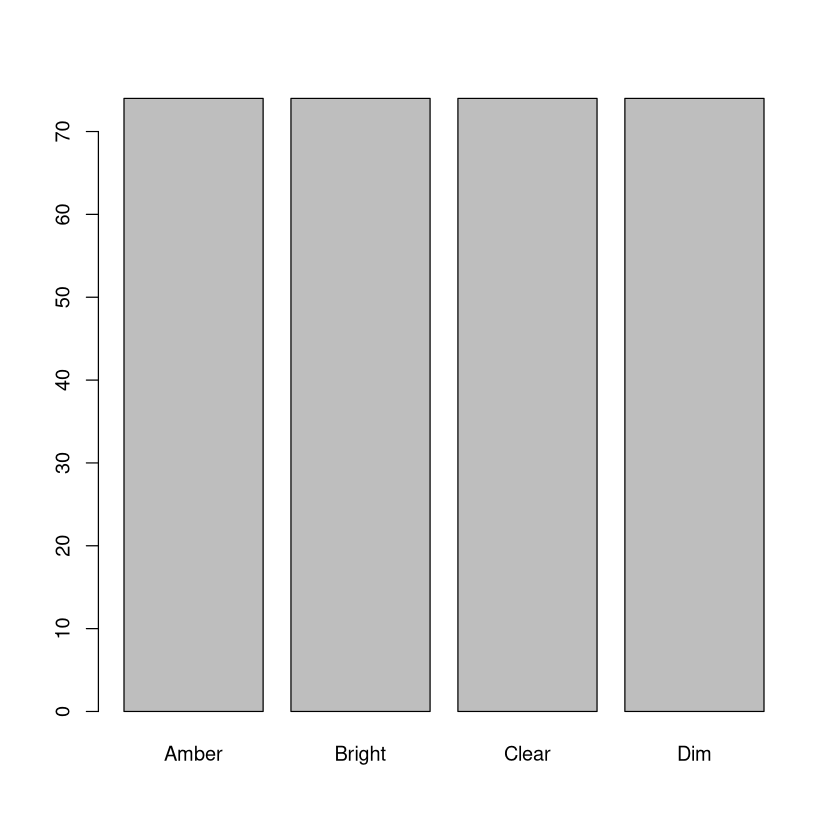

In [101]:
# Sloupcový graf
barplot(cetnosti)


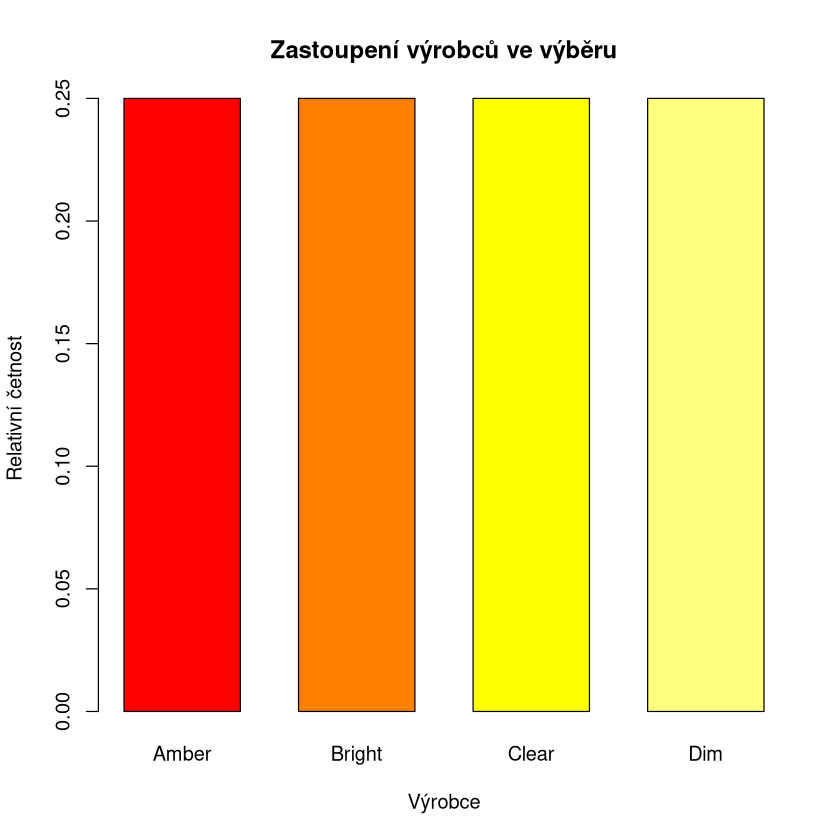

In [102]:
# lze i pro relativní četnosti, také má funkce mnoho dalších parametrů
barplot(rel.cetnosti,
        col = heat.colors(4), # alt. může být volen vektor konkrétních barev, např. c("blue","yellow,"red","green")
        # nebo jiné škály (heat.colors, topo.colors, terrain.colors a mnoho dalších)
        main = "Zastoupení výrobců ve výběru", # nadpis grafu
        space = 0.5, # parametr space vytvoří mezeru mezi sloupci
        xlab = "Výrobce", # popisek osy x
        ylab = "Relativní četnost" # popisek osy y
)


**Graf lze uložit v podobě obrázku následovně:**

In [103]:
# uložení grafu
png("barplot.png") # název souboru
barplot(rel.cetnosti)
dev.off() # ukončení zápisu a uložení na disk


agg_record_1534290647 
                    2

**A v podobě PDF:**


In [104]:
# uložení grafu do pdf, pozor na diaktitiku a kódování
pdf("barplot.pdf", encoding = "ISOLatin2") # název souboru
barplot(rel.cetnosti)
dev.off() # ukončení zápisu a uložení na disk


agg_record_683471576 
                   2

---


# 7. Explorační analýza a vizualizace kvantitativní proměnné

### a) Základní deskriptivní statistiky kvantitativní proměnné
- **průměr** pomocí `mean()` (pozor na chybějící hodnoty, dají se ignorovat pomocí `na.rm = TRUE`)
- **medián** pomocí `median()`
- **rozptyl** pomocí `var()`
- **směrodatná odchylka** pomocí `sd()`
- **kvantily** pomocí `quantile()` (např. `quantile(data$kap5, c(0.25, 0.75))`)
- **velikost výběru** pomocí `length()`
- **variační koeficient** pomocí `sd()/mean()*100`
- **interkvartilové rozpětí** pomocí `IQR()`
- **vnitřní hradby** pomocí `quantile() +/- 1.5*IQR()`
- **šikmost** pomocí `monents::skewness()`
- **špičatost** pomocí `moments::kurtosis() - 3` (Pozor na normalizaci!)


**pozor na chybějící hodnoty, dají se ignorovat pomocí `na.rm = TRUE`**


In [ ]:
#install.packages("moments")

Installing package into ‘/home/patrick115/R/x86_64-pc-linux-gnu-library/4.5’
(as ‘lib’ is unspecified)



In [107]:
# výpočty popisné statistiky pro proměnnou tok5 (pro všechny výrobce)
mean(dataS$tok5, na.rm = TRUE) # průměr
median(dataS$tok5, na.rm = TRUE) # medián
var(dataS$tok5, na.rm = TRUE) # rozptyl
sd(dataS$tok5, na.rm = TRUE) # směrodatná odchylka
quantile(dataS$tok5, probs = c(0.25, 0.75), na.rm = TRUE) # kvartily
length(dataS$tok5) # počet hodnot (pozor jsou včetně NA)
length(dataS$tok5[!is.na(dataS$tok5)]) # počet hodnot bez NA
sd(dataS$tok5, na.rm = TRUE) / mean(dataS$tok5, na.rm = TRUE) * 100 # variační koeficient
IQR(dataS$tok5, na.rm = TRUE) # interkvartilové rozpětí
quantile(dataS$tok5, 0.25, na.rm = TRUE) - 1.5 * IQR(dataS$tok5, na.rm = TRUE) # dolní mez vnitřních hradeb
quantile(dataS$tok5, 0.75, na.rm = TRUE) + 1.5 * IQR(dataS$tok5, na.rm = TRUE) # horní mez vnitřních hradeb
moments::skewness(dataS$tok5, na.rm = TRUE) # šikmost
moments::kurtosis(dataS$tok5, na.rm = TRUE) - 3 # špičatost

[1] 805.4907

[1] 804.7

[1] 886.0821

[1] 29.76713

25%   75% 
783.8 825.3

[1] 296

[1] 281

[1] 3.695527

[1] 41.5

25% 
721.55

75% 
887.55

[1] 0.5916711

[1] 2.629588

**Totéž lze udělat pomocí knihovny `dplyr`**

In [108]:
tabulka_statistik <- dataS %>% summarise(
    prumer = mean(tok5, na.rm = TRUE),
    median = median(tok5, na.rm = TRUE),
    rozptyl = var(tok5, na.rm = TRUE),
    smer.odchylka = sd(tok5, na.rm = TRUE),
    dolni.kvartil = quantile(tok5, 0.25, na.rm = TRUE),
    horni.kvartil = quantile(tok5, 0.75, na.rm = TRUE),
    pocet.radku = n(),
    pocet.hodnot.bez.NA = sum(!is.na(tok5)),
    var.koeficient = sd(tok5, na.rm = TRUE) / mean(tok5, na.rm = TRUE) * 100,
    interkvartilove.rozp = IQR(tok5, na.rm = TRUE),
    dolni.mez.vnitrnihradeb = quantile(tok5, 0.25, na.rm = TRUE) - 1.5 * IQR(tok5, na.rm = TRUE),
    horni.mez.vnitrnihradeb = quantile(tok5, 0.75, na.rm = TRUE) + 1.5 * IQR(tok5, na.rm = TRUE),
    skewness = moments::skewness(tok5, na.rm = TRUE),
    kurtosis = moments::kurtosis(tok5, na.rm = TRUE) - 3
)
t(tabulka_statistik) # transpozice tabulky pro lepší čitelnost

prumer,805.4907473
median,804.7000000
rozptyl,886.0820569
smer.odchylka,29.7671305
dolni.kvartil,783.8000000
horni.kvartil,825.3000000
pocet.radku,296.0000000
pocet.hodnot.bez.NA,281.0000000
var.koeficient,3.6955273
interkvartilove.rozp,41.5000000
dolni.mez.vnitrnihradeb,721.5500000


**A finálně pro každou skupinu zvlášť skrze `group_by`**

In [109]:
tabulka_statistik <- dataS %>%
    group_by(vyrobce) %>%
    summarise(
        prumer = mean(tok5, na.rm = TRUE),
        median = median(tok5, na.rm = TRUE),
        rozptyl = var(tok5, na.rm = TRUE),
        smer.odchylka = sd(tok5, na.rm = TRUE),
        dolni.kvartil = quantile(tok5, 0.25, na.rm = TRUE),
        horni.kvartil = quantile(tok5, 0.75, na.rm = TRUE),
        pocet.radku = n(),
        pocet.hodnot.bez.NA = sum(!is.na(tok5)),
        var.koeficient = sd(tok5, na.rm = TRUE) / mean(tok5, na.rm = TRUE) * 100,
        interkvartilove.rozp = IQR(tok5, na.rm = TRUE),
        dolni.mez.vnitrnihradeb = quantile(tok5, 0.25, na.rm = TRUE) - 1.5 * IQR(tok5, na.rm = TRUE),
        horni.mez.vnitrnihradeb = quantile(tok5, 0.75, na.rm = TRUE) + 1.5 * IQR(tok5, na.rm = TRUE),
        skewness = moments::skewness(tok5, na.rm = TRUE),
        kurtosis = moments::kurtosis(tok5, na.rm = TRUE) - 3
    )
t(tabulka_statistik) # transpozice tabulky pro lepší čitelnost


vyrobce,Amber,Bright,Clear,Dim
prumer,800.5301,825.9516,803.2931,795.3797
median,801.60,823.05,801.95,792.15
rozptyl,1136.8755,531.6475,637.6815,724.3373
smer.odchylka,33.71758,23.05748,25.25236,26.91351
dolni.kvartil,780.700,810.700,787.575,777.375
horni.kvartil,824.60,837.00,823.85,812.40
pocet.radku,74,74,74,74
pocet.hodnot.bez.NA,73,62,72,74
var.koeficient,4.211907,2.791626,3.143604,3.383731
interkvartilove.rozp,43.900,26.300,36.275,35.025


**Můžeme si třeba vytvořit funkci, co nám takovýto přehled vytvoří pro náš zadaný datový rámec a příslušné třízení + data.**

In [110]:
statistika_sloupce <- function(data, column_group, column_data) {
    `%>%` <- dplyr::`%>%` # Define the pipe operator explicitly

    tabulka_statistik <- data %>%
        dplyr::group_by({{ column_group }}) %>% # Group by the specified column
        dplyr::summarise(
            rozsah_souboru = sum(!is.na({{ column_data }})),
            minimum = min({{ column_data }}, na.rm = TRUE),
            dolni_kvartil = quantile({{ column_data }}, 0.25, na.rm = TRUE),
            median = median({{ column_data }}, na.rm = TRUE),
            prumer = mean({{ column_data }}, na.rm = TRUE),
            horni_kvartil = quantile({{ column_data }}, 0.75, na.rm = TRUE),
            maximum = max({{ column_data }}, na.rm = TRUE),
            smerodatna_odchylka = sd({{ column_data }}, na.rm = TRUE),
            variacni_koeficient = sd({{ column_data }}, na.rm = TRUE) /
                mean({{ column_data }}, na.rm = TRUE) * 100,
            sikmost = moments::skewness({{ column_data }}, na.rm = TRUE),
            spicatost = moments::kurtosis({{ column_data }}, na.rm = TRUE) - 3,
            dolni_mez_vnitrni_hradeb = quantile({{ column_data }}, 0.25, na.rm = TRUE) -
                1.5 * IQR({{ column_data }}, na.rm = TRUE),
            horni_mez_vnitrni_hradeb = quantile({{ column_data }}, 0.75, na.rm = TRUE) +
                1.5 * IQR({{ column_data }}, na.rm = TRUE)
        )

    names_vars <- tabulka_statistik %>% dplyr::pull({{ column_group }})

    tabulka_statistik <- tabulka_statistik[, -1] # Remove the grouping column
    tabulka_statistik <- as.data.frame(t(tabulka_statistik)) # Transpose for better readability
    colnames(tabulka_statistik) <- names_vars # Set column names

    return(tabulka_statistik)
}

tabulka_statistik <- statistika_sloupce(dataS, vyrobce, tok5)
tabulka_statistik


,Amber,Bright,Clear,Dim
,<dbl>,<dbl>,<dbl>,<dbl>
rozsah_souboru,73.0000000,62.000000,72.0000000,74.000000
minimum,714.6000000,788.300000,720.4000000,755.900000
dolni_kvartil,780.7000000,810.700000,787.5750000,777.375000
median,801.6000000,823.050000,801.9500000,792.150000
prumer,800.5301370,825.951613,803.2930556,795.379730
horni_kvartil,824.6000000,837.000000,823.8500000,812.400000
maximum,940.0000000,936.100000,844.3000000,924.700000
smerodatna_odchylka,33.7175840,23.057482,25.2523563,26.913514
variacni_koeficient,4.2119069,2.791626,3.1436045,3.383731


**Může se hodit si takovou tabulku uložit do excelu pomocí `openxlsx::write.xlsx()`:**

In [111]:
# export tabulky do excelu (opět transponovaně), bohužel konverze na data.frame je nutná
openxlsx::write.xlsx(tabulka_statistik,
    file = "tabulka_statistik.xlsx",
    rowNames = TRUE, # jednotlivé názvy polí jsou rownames
    colNames = TRUE # názvy sloupců jsou jednotlivé skupiny
)


### b) Krabicový graf

Co na grafu vidíme:
- **medián** (čára uvnitř krabice),
- **kvartily** (spodní a horní okraj krabice),
- **minimální a maximální hodnoty bez odlehlých pozorování** (čárky/whiskers),
- **odlehlá pozorování** (body mimo čáry).

**Vykreslujeme vždy pro originální data, můžeme doplnit i vykreslení pro data bez OP v případech, kdy byl originální graf příliš roztažený extrémními OP.**

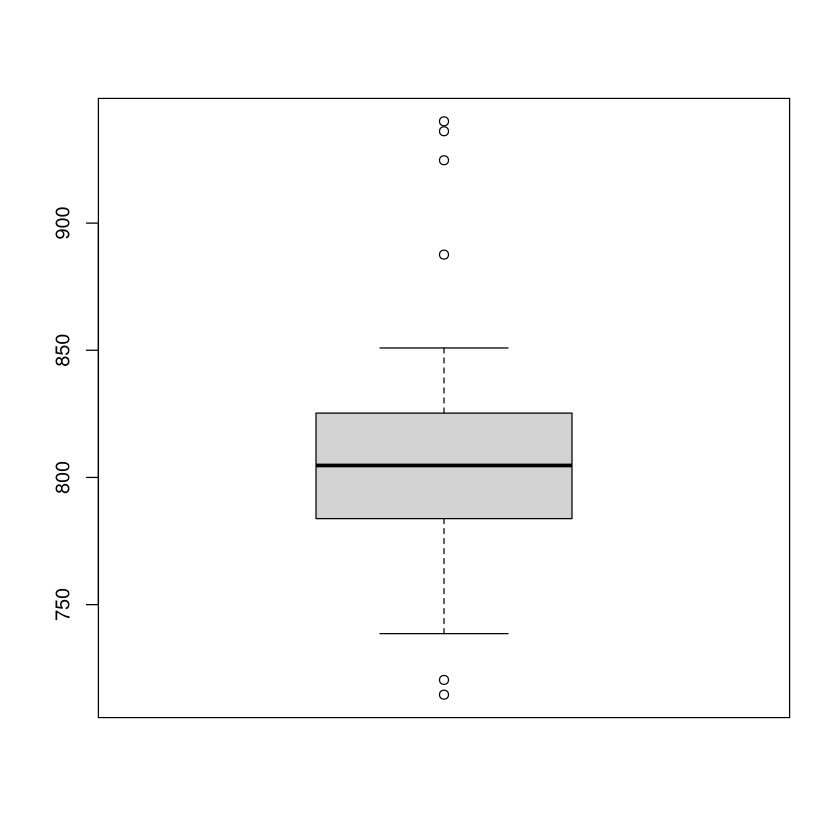

In [112]:
# Jednoduché a rychlé vykreslení pomocí základní funkce pro jeden vektor
boxplot(dataS$tok5)


#### Vždy když budeme uvádět více boxplotů pro srovnatelná data (například různé skupiny), je ***nutné*** je vykreslit v jednom grafu
- vícenásobný boxplot se jednoduše vykreslí pro data ve standardním datovém formátu
- syntaxe je pomocí `~`: `boxplot(hodnoty ~ trizeni, data = data)`

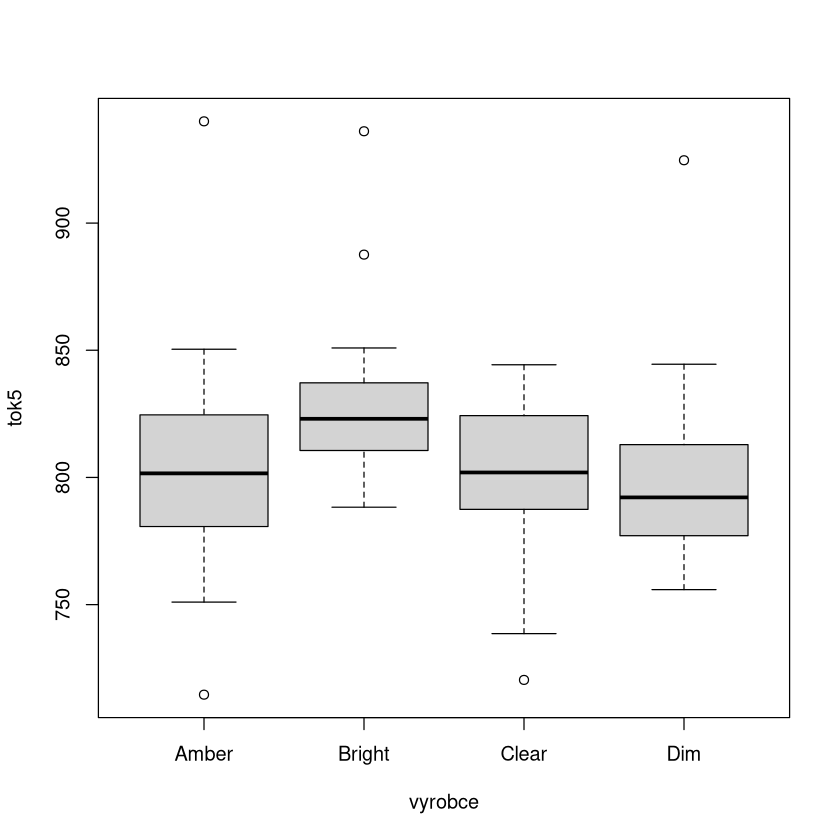

In [113]:
# vykreslení vícenásobného krabicového grafu
boxplot(tok5 ~ vyrobce, dataS)


In [ ]:
# Při vytváření grafu pro publikace je nutné dodržet určité standardy úpravy

boxplot(tok5 ~ vyrobce, dataS,
    xlab = "Výrobce", # popisek osy x
    ylab = "Světelný tok [lm]", # popisek osy y
    main = "Světelný tok při 5°C v závislosti na výrobci" # nadpis grafu (vynechat pokud je součástí textu)
)
grid() # přidání mřížky do grafu pro snadnější porovnání hodnot

**Samozřejmě můžeme uložit stejným způsobem jako u předchozího sloupcového grafu.**

In [ ]:
png("boxplot.png", width = 800, height = 500) # název souboru a velikost grafu v pixelech
boxplot(tok5 ~ vyrobce, dataS, xlab = "Výrobce", ylab = "Světelný tok [lm]")
grid()
dev.off() # ukončení zápisu a uložení na disk

In [ ]:
# velikost (v palcích) a kódování
pdf("boxplot.pdf", width = 8, height = 5, encoding = "ISOLatin2")
boxplot(tok5 ~ vyrobce, dataS, xlab = "Výrobce", ylab = "Světelný tok [lm]")
grid()
dev.off() # ukončení zápisu a uložení na disk

### c) Vnitřní hradby a identifikace odlehlých pozorování
- odlehlá pozorování, které jsme viděli i v boxplotu jsou identifikována pomocí vnitřních hradeb
- tato pozorování často umí znehodnotit číselné charakteristiky, proto je vhodné se s nimi nějakým způsobem vypořádat
- jedním z "universálních" způsobů je jejich odstranění

Identifikaci odlehlých pozorování budeme provádět pomocí `dplyr` a funkce `rstatix::identify_outliers()`
- je třeba aby data byla ve standardním datovém formátu a obsahovala sloupec s identifikátorem entity (např. `id`)
- odstranění děláme vždy pro každou skupinu zvlášť!

Následné odstranění provedeme pomocí definice nového sloupce, který bude obsahovat pouze data bez odlehlých pozorování. **Tímto způsobem si zachováme původní data!** 
```
data$hodnota_bez_OP <- ifelse(data$id %in% OP$id, NA, data$hodnota)
# nebo
data <- data %>% mutate(hodnota_bez_OP = ifelse(id %in% OP$id, NA, hodnota))
```

In [114]:
# data jsou ve standardním formátu
# obsahují také sloupec id
# kdyby zde nebyl přítomen lze doplnit buďto
dataS$id <- seq_along(dataS$tok5)
# nebo
dataS <- dataS %>% mutate(id = row_number())
head(dataS)

,vyrobce,tok5,tok22,id,pokles
,<chr>,<dbl>,<dbl>,<int>,<dbl>
1.Amber,Amber,786.6,784.9,1,-1.7
2.Amber,Amber,783.8,782.0,2,-1.8
3.Amber,Amber,785.3,782.6,3,-2.7
4.Amber,Amber,772.2,777.7,4,5.5
5.Amber,Amber,825.3,824.7,5,-0.6
6.Amber,Amber,759.1,759.1,6,0.0


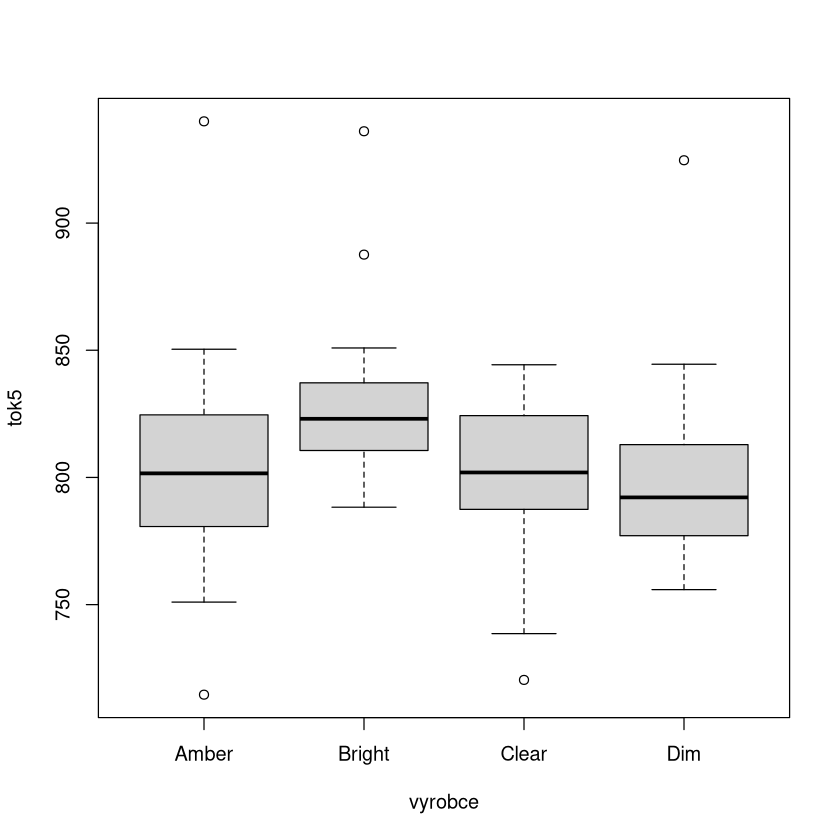

In [115]:
# pro srovnán vykreslíme oba grafy s i bez OP
boxplot(tok5 ~ vyrobce, dataS)


In [ ]:
#install.packages("rstatix")

Installing package into ‘/home/patrick115/R/x86_64-pc-linux-gnu-library/4.5’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gtable’, ‘isoband’, ‘S7’, ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘ggplot2’, ‘modelr’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘farver’, ‘labeling’, ‘RColorBrewer’, ‘viridisLite’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘scales’, ‘tidyr’, ‘broom’, ‘corrplot’, ‘car’


Warning message in install.packages("rstatix"):
“installation of package ‘SparseM’ had non-zero exit status”
Warning message in install.packages("rstatix"):
“installation of package ‘minqa’ had non-zero exit status”
Warning message in install.packages("rstatix"):
“installation of package ‘quantreg’ had non-zero exit status”
Warning message in install.packages("rstatix"):
“installation of package ‘lme4’ had non-zero exit status”
Warning message in install.packages("rstatix"):
“installation of 

In [119]:
# díky funkci identify_outliers z balíčku rstatix můžeme identifikovat odlehlé hodnoty
# dostaneme jejich seznam včetně náležitosti do skupin, id, ...
# toto se hodí pro jednoduchý reporting počtu OP a jejich identifikaci
OP_tok5 <-
  dataS %>%
  group_by(vyrobce) %>%
  rstatix::identify_outliers(tok5)
OP_tok5


vyrobce,tok5,tok22,id,pokles,is.outlier,is.extreme
<chr>,<dbl>,<dbl>,<int>,<dbl>,<lgl>,<lgl>
Amber,714.6,819.4,7,104.8,TRUE,FALSE
Amber,940.0,942.4,15,2.4,TRUE,FALSE
Bright,887.6,797.6,85,-90.0,TRUE,FALSE
Bright,936.1,935.9,101,-0.2,TRUE,TRUE
Clear,720.4,815.8,158,95.4,TRUE,FALSE
Dim,924.7,923.8,273,-0.9,TRUE,TRUE


In [120]:
# informaci o OP můžeme využít pro vyrobení nového sloupce s vynechanými OP
dataS$tok5OP <- ifelse(dataS$id %in% OP_tok5$id, NA, dataS$tok5)
# nebo
dataS <- dataS %>% mutate(tok5OP = ifelse(id %in% OP_tok5$id, NA, tok5))

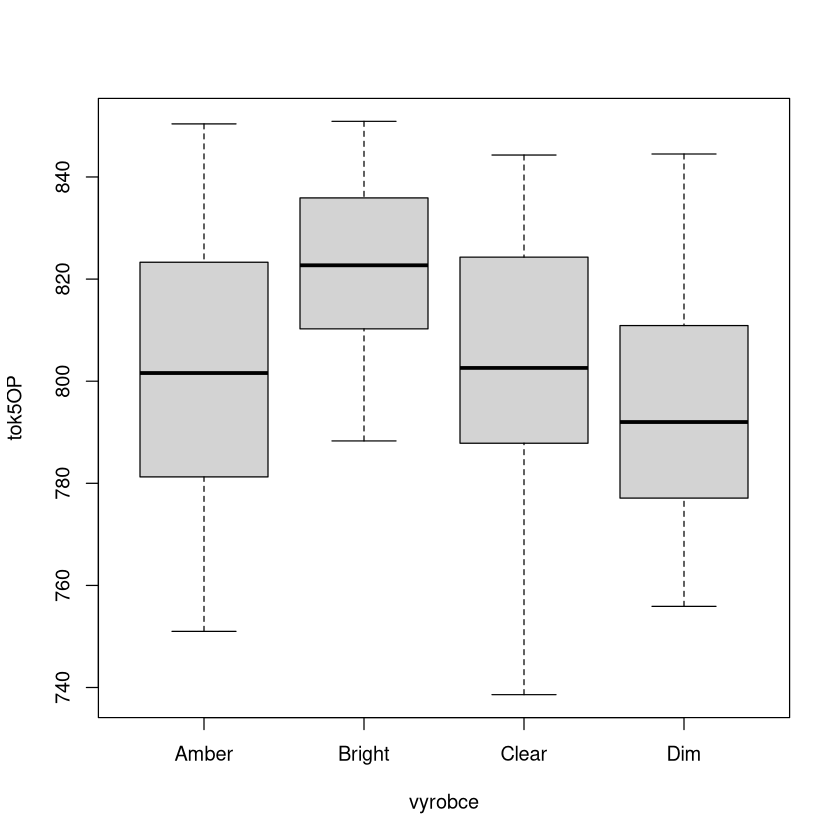

In [121]:
boxplot(tok5OP ~ vyrobce, dataS)


In [122]:
# a můžeme použít dříve definovanou funkci pro výpočet statistik bez OP
tabulka_statistik <- statistika_sloupce(dataS, vyrobce, tok5OP)
tabulka_statistik


,Amber,Bright,Clear,Dim
,<dbl>,<dbl>,<dbl>,<dbl>
rozsah_souboru,71.000000000,60.0000000,71.00000000,73.0000000
minimum,751.000000000,788.3000000,738.60000000,755.9000000
dolni_kvartil,781.250000000,810.4250000,787.85000000,777.1000000
median,801.600000000,822.7000000,802.60000000,792.0000000
prumer,799.776056338,823.0883333,804.46056338,793.6082192
horni_kvartil,823.300000000,835.6500000,824.30000000,810.9000000
maximum,850.400000000,850.9000000,844.30000000,844.5000000
smerodatna_odchylka,28.025200215,16.4705190,23.39332920,22.3370007
variacni_koeficient,3.504130937,2.0010634,2.90795227,2.8146131


**Analytik může vždy říct, že odlehlá pozorování odstraňovat nebude, ale tuto informaci musí do zápisu o analýze uvést!**

### d) Histogramy a aproximace hustoty pravděpodobnosti

- **`hist()`** – vytvoří histogram kvantitativní proměnné, **Pozor, vyžaduje vstup v podobě numerického vektoru!**
    - není ochotno fungovat pro `tibble`/`data.frame` i pokud máme jen jeden sloupec, je třeba jej dostat přes `data$sloupec`
    - parametr `breaks` určuje počet intervalů
    - parametr `freq` určuje, zda chceme zobrazit absolutní četnosti nebo odhad hustoty pravděpodobnosti
- **`density()`** – vytvoří aproximaci hustoty pravděpodobnosti z histogramu
    - **Nemá rádo NA hodnoty!**

**Vykreslujeme vždy pro data bez odlehlých pozorování!!**

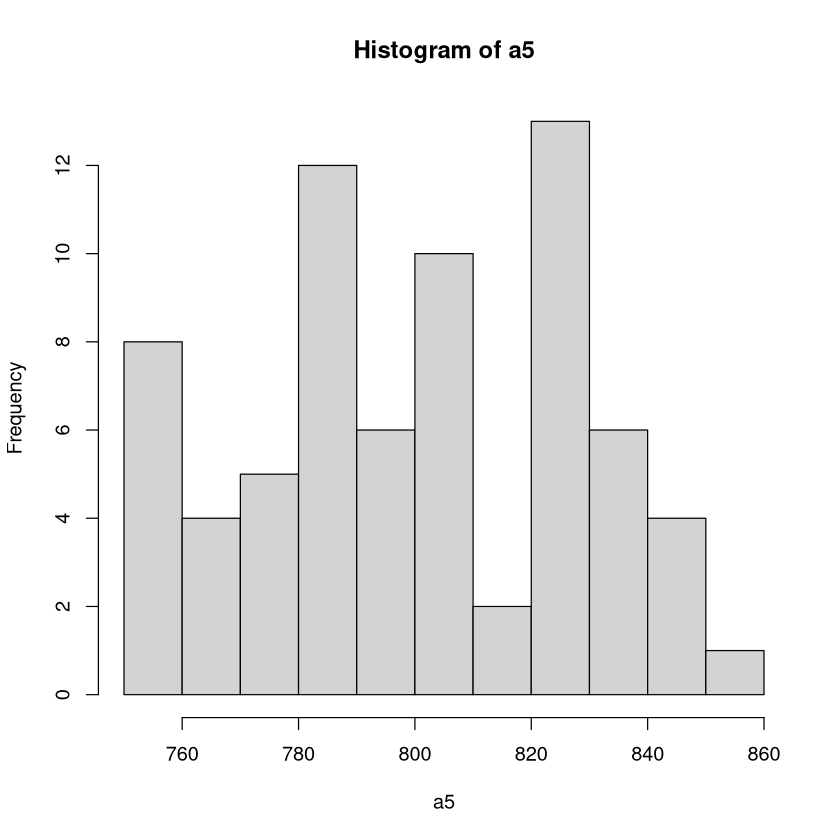

In [123]:
# Jednoduché a rychlé vykreslení
a5 <- dataS %>%
    filter(vyrobce == "Amber") %>%
    select(tok5OP)
a5 <- na.omit(a5$tok5OP) # odstraní řádky s NA a vybere pouze numerické hodnoty
hist(a5)


Lze si hrát s parametry, přidat do jednoho grafu i odhad hustoty pravděpodobnosti, a fit pomocí normálního rozdělení.

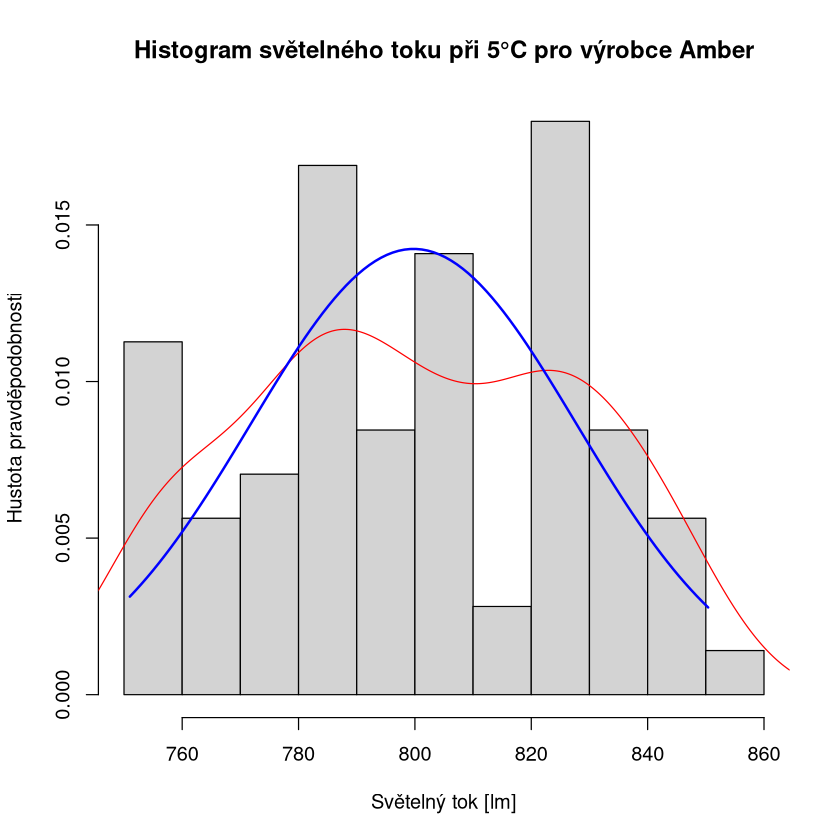

In [124]:
# Již tradičně lze nastavit popisky a další parametry
hist(a5,
    main = "Histogram světelného toku při 5°C pro výrobce Amber",
    xlab = "Světelný tok [lm]",
    ylab = "Hustota pravděpodobnosti",
    freq = FALSE, # relativní četnosti
    breaks = 10 # počet intervalů
) # přidá absolutní četnosti daných kategorií ve formě popisků

lines(density(a5), col = "red") # přidá odhad hustoty pravděpodobnosti

# generování hodnot pro osu x
xfit <- seq(min(a5), max(a5), length = 100)
# generování hodnot pro osu y
yfit <- dnorm(xfit, mean = mean(a5), sd = sd(a5))

# přidání křivky odhdu pomocí normálního rozdělení
lines(xfit, yfit, col = "blue", lwd = 2)
# Takto kombinovaný graf může posloužit k vizuálnímu posouzení normality.

A samozřejmě exportovat například do PDF.

In [125]:
pdf("histogram.pdf", width = 8, height = 5, encoding = "ISOLatin2")
hist(a5,
    freq = FALSE, breaks = 10,
    xlab = "Světelný tok [lm]", ylab = "Hustota pravděpodobnosti", main = ""
)
grid()
dev.off() # ukončení zápisu a uložení na disk


agg_record_1185766719 
                    2

### e) QQ-graf
Vykreslíme pomocí `qqnorm()` a `qqline()`. Stajně jako u histogramu, je třeba mít data ve formátu numerického vektoru.

**Vykreslujeme vždy pro data bez odlehlých pozorování!!**

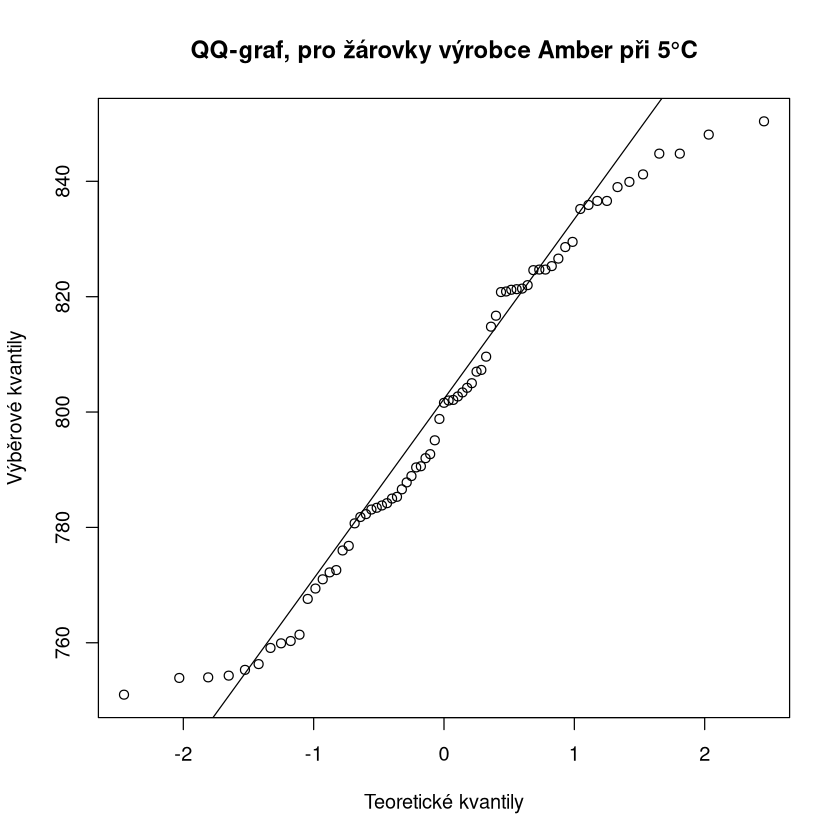

In [126]:
# Nezapomenout na popisků os...
qqnorm(a5,
    xlab = "Teoretické kvantily",
    ylab = "Výběrové kvantily",
    main = "QQ-graf, pro žárovky výrobce Amber při 5°C"
)
qqline(a5)


---

# 8. pravidlo 3 $\sigma$ a Čebyševova nerovnost
### a) Empirické ověření normality
- provádíme vizuálně: 
    - pomocí QQ-grafu: pokud body leží na přímce, můžeme předpokládat normální rozdělení
    - pomocí histogramu: musí být "podobný" normálnímu rozdělení
- numericky:
    - pomocí šikmosti: musí ležet v intervalu $(-2,2)$
    - pomocí špičatosti: musí ležet v intervalu $(-2,2)$

In [127]:
# vyrobíme si data pro ukázku
data1 <- rnorm(100, mean = 1, sd = 1)
data2 <- runif(100, min = 0, max = 2)
data3 <- rexp(100, rate = 1)


**Všechny nástroje pro ověření normality jsme si již ukázali, můžeme je zabalit do jedné funkce:**

In [128]:
exploracni_overeni_normality <- function(data) {
    # výpočet popisných statistik
    sikmost <- moments::skewness(data)
    spicatost <- moments::kurtosis(data) - 3
    cat("Šikmost:", sikmost, "\n")
    cat("Špičatost:", spicatost, "\n")

    # QQ graf
    qqnorm(data)
    qqline(data)

    # histogram s odhadem hustoty pravděpodobnosti normálního rozdělení
    hist(data,
        freq = FALSE, breaks = 10,
        xlab = "Světelný tok [lm]", ylab = "Hustota pravděpodobnosti", main = ""
    )
    xfit <- seq(min(data), max(data), length = 100)
    yfit <- dnorm(xfit, mean = mean(data), sd = sd(data))
    lines(xfit, yfit, col = "blue", lwd = 2)
}


Šikmost: 0.1091392 
Špičatost: 0.05207618 


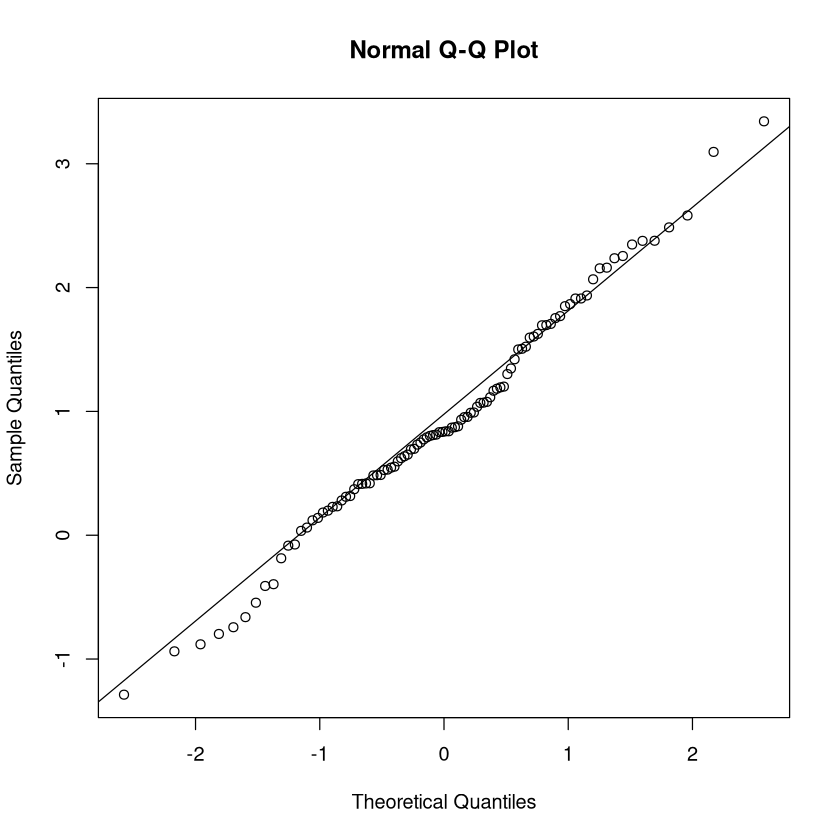

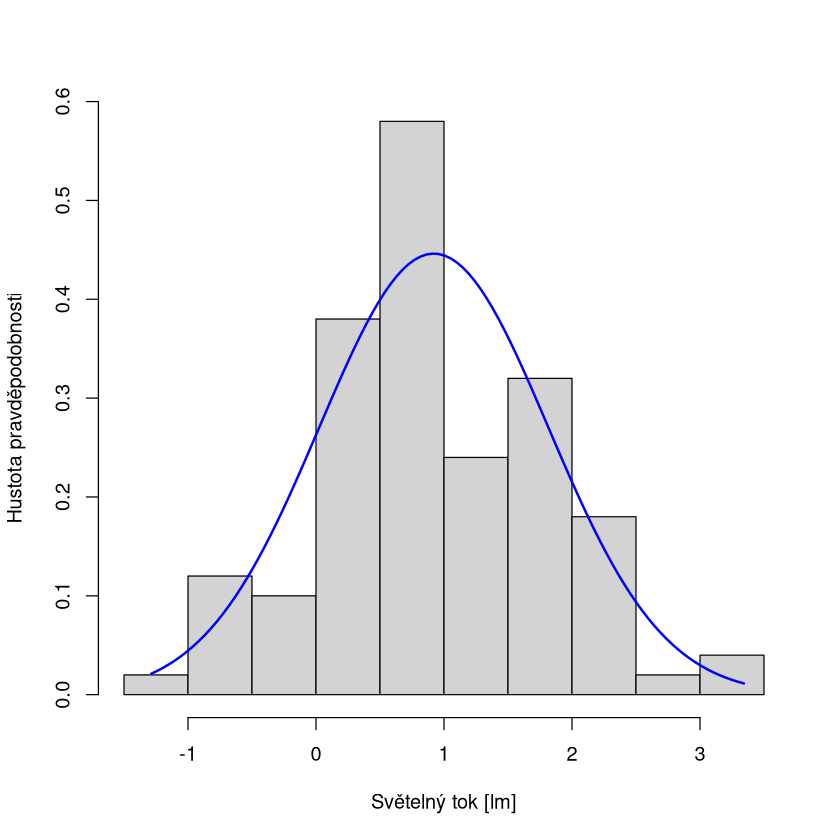

In [129]:
# jak to vypadá pro skutečná data z normálního rozdělení
exploracni_overeni_normality(data1)

Šikmost: 0.2151067 
Špičatost: -1.220538 


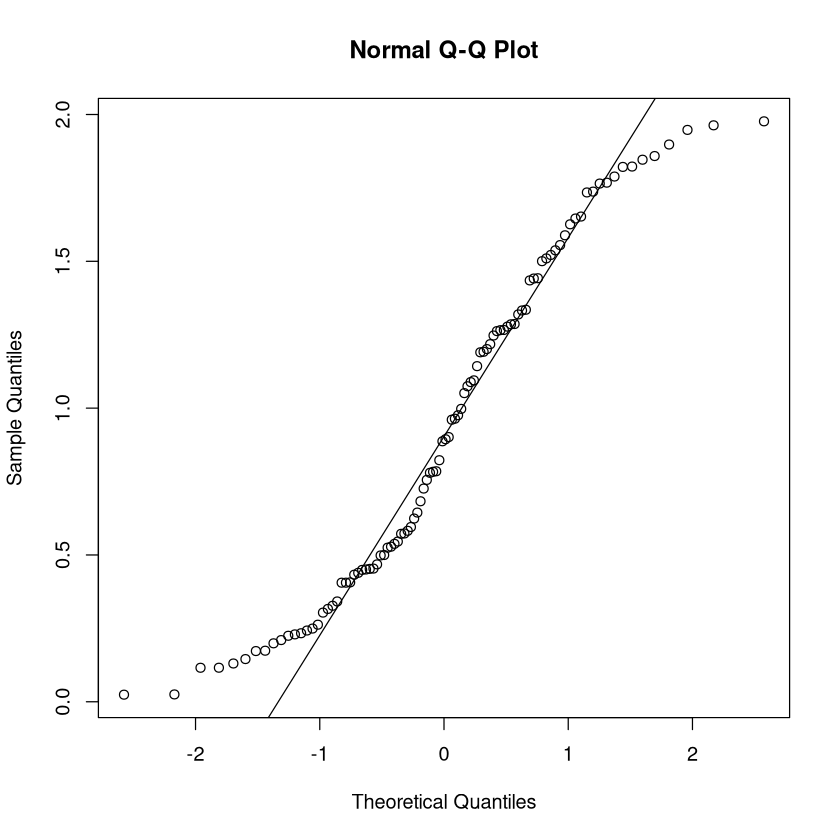

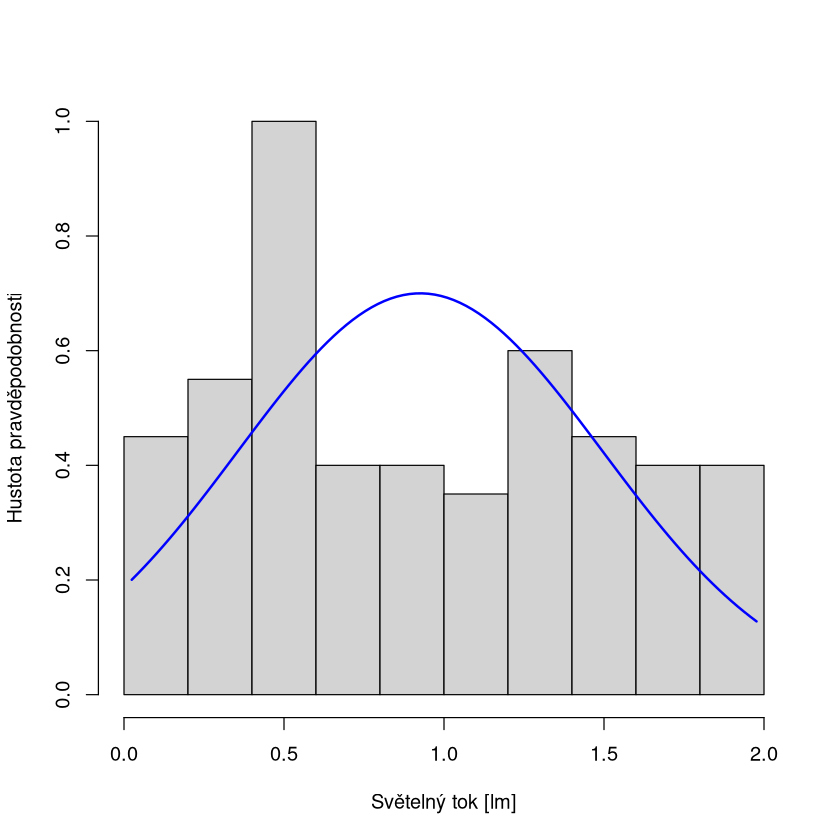

In [130]:
# jak to vypadá pro skutečná data z uniformního rozdělení
exploracni_overeni_normality(data2)

Šikmost: 1.867134 
Špičatost: 4.777869 


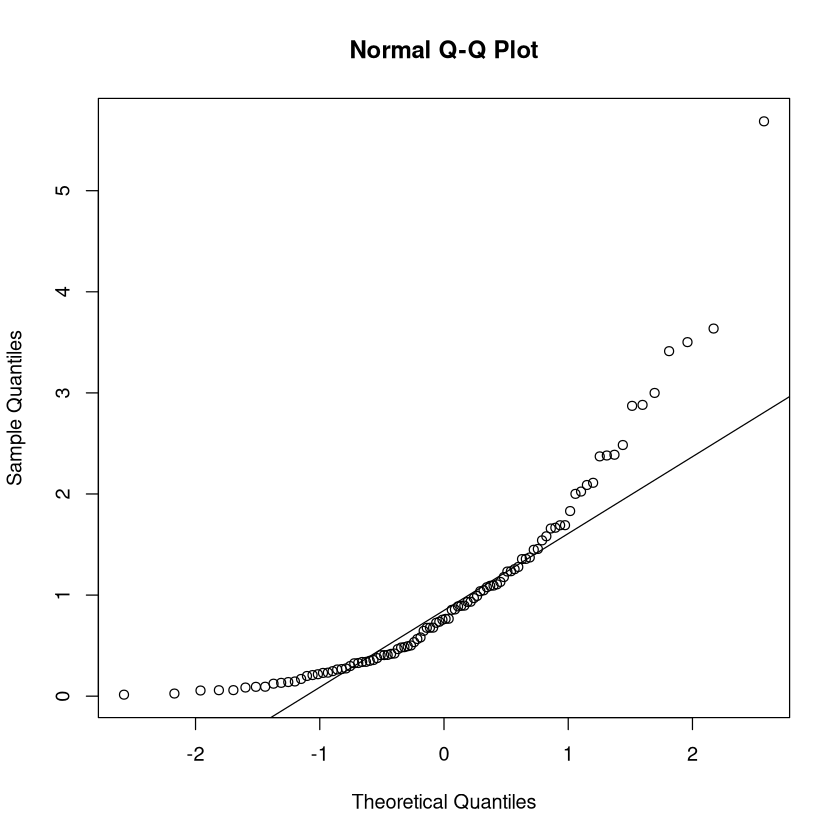

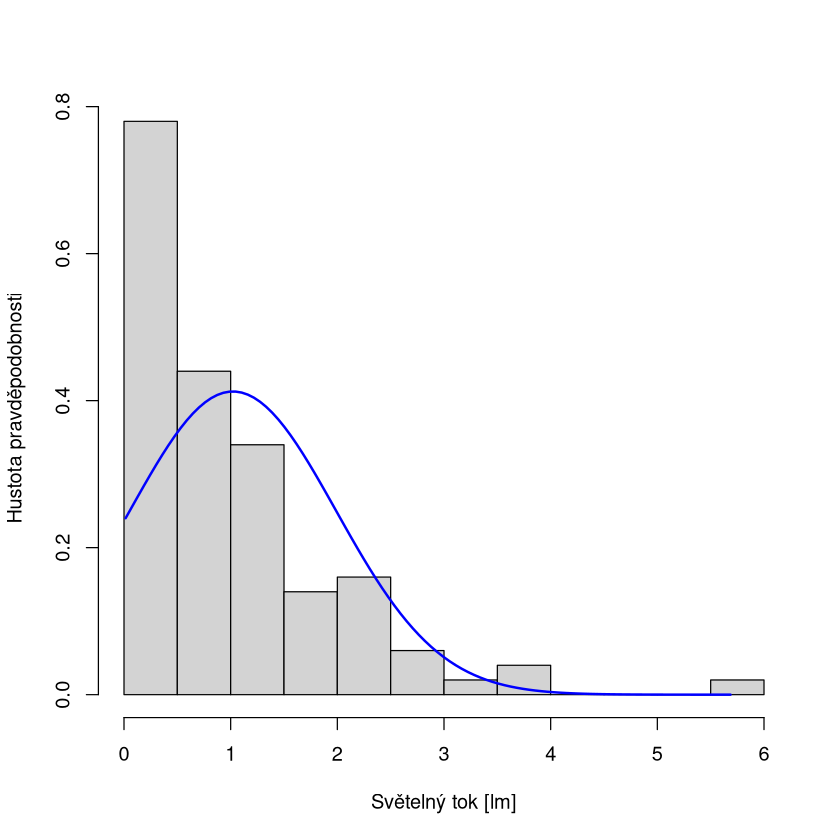

In [131]:
# jak to vypadá pro skutečná data z exponenciálního rozdělení
exploracni_overeni_normality(data3)

### b) Pravidlo 3 $\sigma$ a Čebyševova nerovnost

**Je-li splněna normalita dat → pravidlo $3\sigma$**  
$\sigma$:  $P(\mu - \sigma < X < \mu + \sigma) = 0.6827$  
$2\sigma$: $P(\mu - 2\sigma < X < \mu + 2\sigma) = 0.9545$  
$3\sigma$: $P(\mu - 3\sigma < X < \mu + 3\sigma) = 0.9973$  

**Není-li splněna normalita dat → Čebyševova nerovnost**  
$\sigma$:  $P(\mu - \sigma < X < \mu + \sigma) = 0$  
$2\sigma$: $P(\mu - 2\sigma < X < \mu + 2\sigma) = 0.75$  
$3\sigma$: $P(\mu - 3\sigma < X < \mu + 3\sigma) = 0.8889$  


In [132]:
# data pro světelný tok výrobce Amber při 5°C bez OP
A_tok5OP <- dataS %>%
    filter(vyrobce == "Amber") %>%
    select(tok5OP)
A_tok5OP <- na.omit(A_tok5OP$tok5OP)
A_tok5OP

[1] 786.6 783.8 785.3 772.2 825.3 759.1 781.8 850.4 792.7 772.6 821.2 783.4
[13] 824.7 790.4 804.2 787.8 844.8 798.8 761.4 809.6 821.4 835.9 814.8 788.9
[25] 839.0 783.1 753.9 795.1 820.9 771.0 835.2 826.6 755.3 820.8 756.3 802.0
[37] 785.0 754.0 848.1 822.0 807.3 839.9 802.1 821.3 803.4 767.6 844.8 790.6
[49] 824.6 792.0 754.3 829.5 836.6 816.7 784.2 751.0 782.3 807.0 836.6 802.7
[61] 776.0 801.6 760.3 780.7 841.2 824.7 759.9 805.0 769.4 828.6 776.8
attr(,"na.action")
[1]  7 15 74
attr(,"class")
[1] "omit"

In [133]:
# příslušné 1, 2 a 3 sigma intervaly
mu <- mean(A_tok5OP)
sigma <- sd(A_tok5OP)
cat("<", mu - sigma, ", ", mu + sigma, ">\n")
cat("<", mu - 2 * sigma, ", ", mu + 2 * sigma, ">\n")
cat("<", mu - 3 * sigma, ", ", mu + 3 * sigma, ">\n")


< 771.7509 ,  827.8013 >
< 743.7257 ,  855.8265 >
< 715.7005 ,  883.8517 >


---

# 9. Zaokrouhlování

Vše potřebné k zaokrouhlování naleznete na LMS v dokumentu [Zaokrouhlování](https://lms.vsb.cz/pluginfile.php/1298954/mod_folder/content/0/Leg%C3%A1ln%C3%AD%20tah%C3%A1ky/zaokrouhlovani.pdf).  

#### To nejdůležitější:
- Směrodatnou odchylku zaokrouhlujeme na předepsaný počet cifer nahoru (*ceiling*):  
  - Velikost datového souboru $\in \langle 2,10 \rangle$ → **1 platná cifra**  
  - Velikost datového souboru $\in (10,30 \rangle$ → **2 platné cifry**  
  - Velikost datového souboru $\in (30,2000 \rangle$ → **3 platné cifry**  

- Míry polohy (průměry, kvantily, ...) pak zaokrouhlujeme klasicky (*round*) na stejnou platnou cifru jako směrodatnou odchylku.


In [134]:
# podíváme se na velikost souboru a směrodatnou odchylku
length(A_tok5OP)
smer_odch <- sd(A_tok5OP)
smer_odch


[1] 71

[1] 28.0252

In [135]:
# na 3 platné cifry, tedy na jedno desetinné místo
ceiling(smer_odch * 10) / 10

[1] 28.1

In [136]:
prumer <- mean(A_tok5OP)
prumer


[1] 799.7761

In [137]:
round(prumer, digits = 1)


[1] 799.8